In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('traffic.csv')

data['DateTime'] = pd.to_datetime(data['DateTime'])

daily_avg = data.groupby(data['DateTime'].dt.date)['Vehicles'].mean().reset_index()
daily_avg.rename(columns={'DateTime': 'Date', 'Vehicles': 'DailyAvg'}, inplace=True)

df = daily_avg
print(df.head())
print(df.tail())
df.describe()

         Date   DailyAvg
0  2015-11-01   8.277778
1  2015-11-02  12.625000
2  2015-11-03  12.652778
3  2015-11-04  11.361111
4  2015-11-05  10.694444
           Date   DailyAvg
603  2017-06-26  30.791667
604  2017-06-27  38.635417
605  2017-06-28  37.281250
606  2017-06-29  37.239583
607  2017-06-30  35.031250


,DailyAvg
count,608.000000
mean,22.297018
std,7.006339
min,7.375000
25%,17.361111
50%,21.777778
75%,27.972222
max,40.541667


In [2]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.DailyAvg.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.019845
p-value: 0.745957


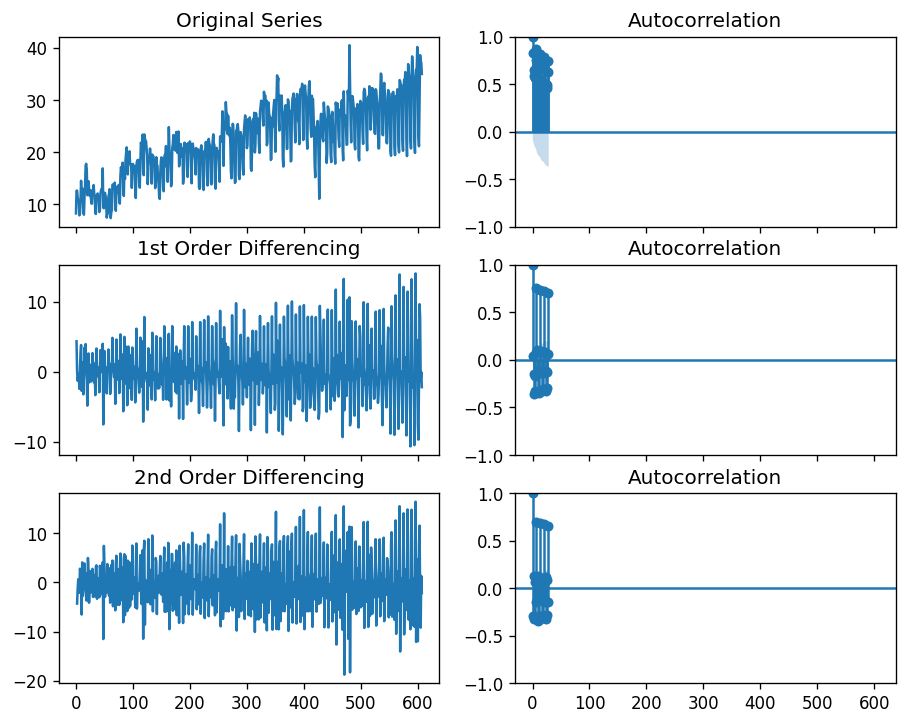

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.DailyAvg); axes[0, 0].set_title('Original Series')
plot_acf(df.DailyAvg, ax=axes[0, 1])

axes[1, 0].plot(df.DailyAvg.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.DailyAvg.diff().dropna(), ax=axes[1, 1])

axes[2, 0].plot(df.DailyAvg.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.DailyAvg.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

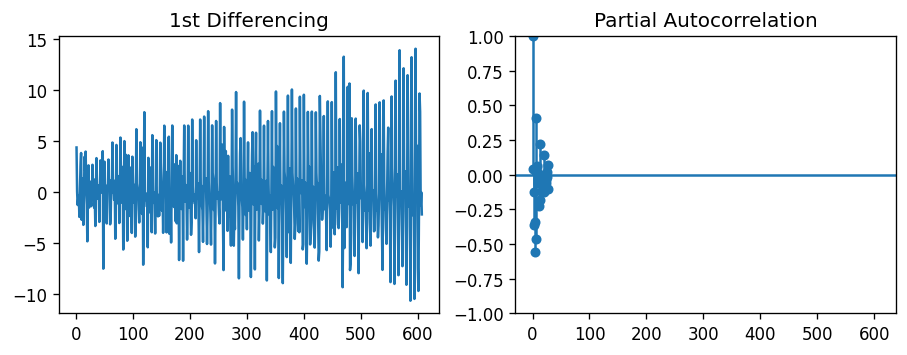

In [4]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.DailyAvg.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.DailyAvg.diff().dropna(), ax=axes[1])

plt.show()

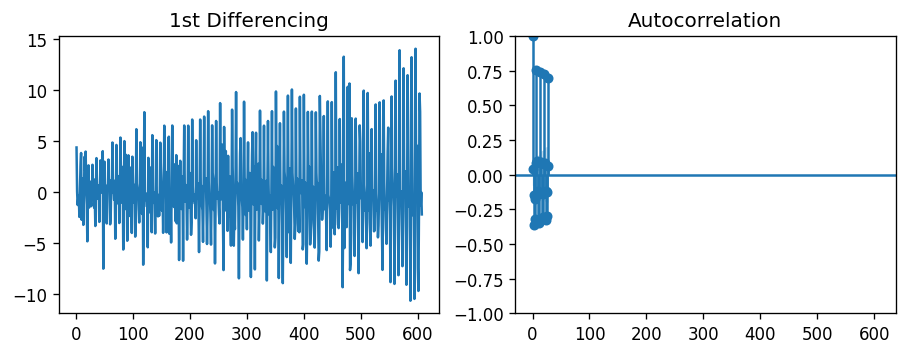

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.DailyAvg.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.DailyAvg.diff().dropna(), ax=axes[1])

plt.show()

In [6]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df.DailyAvg, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

c:\users\lilvinzivert\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               DailyAvg   No. Observations:                  608
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1589.084
Date:                Tue, 10 Oct 2023   AIC                           3186.169
Time:                        22:20:55   BIC                           3203.803
Sample:                             0   HQIC                          3193.030
                                - 608                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1028      0.056      1.828      0.068      -0.007       0.213
ma.L1         -0.3093      0.045     -6.805      0.000      -0.398      -0.220
ma.L2         -0.5912      0.041    -14.365      0.0

In [7]:
model = ARIMA(df.DailyAvg, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               DailyAvg   No. Observations:                  608
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1634.323
Date:                Tue, 10 Oct 2023   AIC                           3274.646
Time:                        22:20:55   BIC                           3287.872
Sample:                             0   HQIC                          3279.792
                                - 608                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5121      0.034     14.981      0.000       0.445       0.579
ma.L1         -0.9523      0.015    -63.200      0.000      -0.982      -0.923
sigma2        12.7410      0.737     17.280      0.0

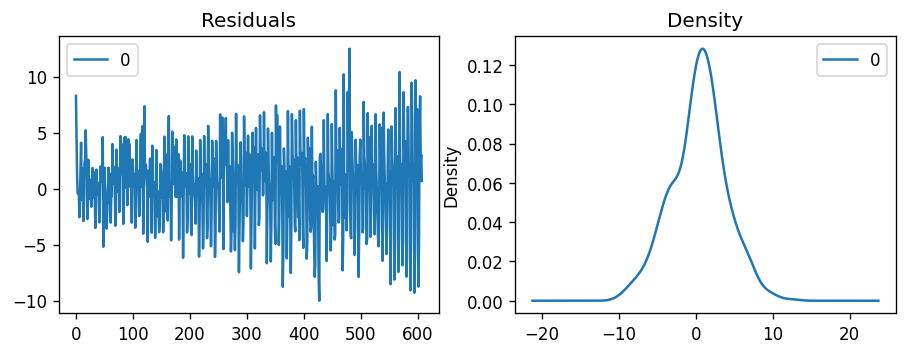

In [8]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

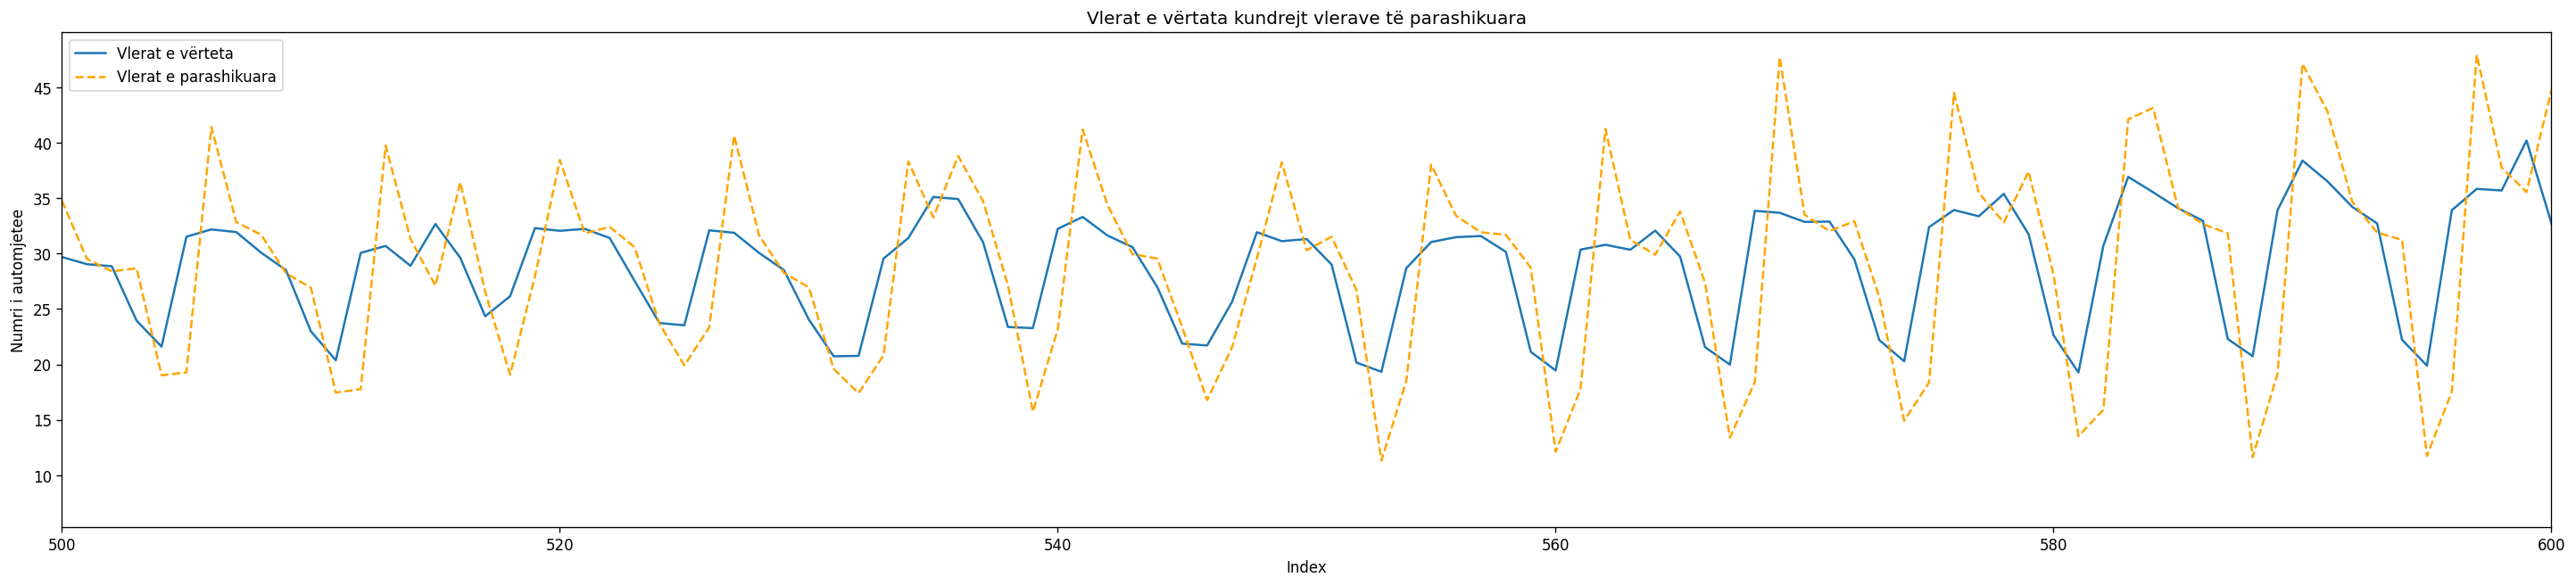

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

res = ARIMA(df.DailyAvg, order=(0, 2, 0)).fit()

start_index = 500  

predicted = res.predict(start=start_index, end=len(df)-1, typ='levels')

fig, ax = plt.subplots(figsize=(30, 6))
ax.plot(df.index, df.DailyAvg, label='Vlerat e vërteta')
ax.plot(df.index[start_index:], predicted, color='orange', linestyle='dashed', label='Vlerat e parashikuara')
ax.set_xlabel('Index')
ax.set_xlim(500, 600)
ax.set_ylabel('Numri i automjetee')
ax.set_title('Vlerat e vërtata kundrejt vlerave të parashikuara')
ax.legend()
plt.savefig("ARIMA_B.png")
plt.show()


In [14]:
predicted = res.predict(start=0, end=len(df)-1, typ='levels')  # Ensure it covers all data points

mse = mean_squared_error(df['DailyAvg'], predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df['DailyAvg'], predicted)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 30.776297542319384
RMSE: 5.547638916000156
MAE: 4.333356072183878
